In [ ]:
#Librerias
#Manipulación numérica
import numpy as np
#Construccion y entrenamiento de redes neuronales
import tensorflow as tf
#Construccion de modelo capa por capa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
#Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix, f1_score
#Visualización de datos
import matplotlib.pyplot as plt
#Procesamiento de imagen
from PIL import Image

In [ ]:
#Parte 1: Preparación del Dataset
#I. Carga del dataset MNIST#
# Cargar y preparar los datos MNIST
#Usa tensorflow.keras.datasets.mnist para cargar los datos de entrenamiento y
#prueba.
#Contiene imagenes de digitos escritos a mano del 0 al 9
mnist = tf.keras.datasets.mnist
#Divide el conjunto en: x_train, y_train, x_test, y_test.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos
#Normaliza las imágenes (escalar los valores de píxeles entre 0 y 1).
#Estose logra dividiendo cada valor entre 255 que es el valor maximo de un pixel
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Redimensionar para CNN (añadir canal de color)
#Asegúrate de que las imágenes tengan la forma correcta para una CNN
#(28x28x1).
IMG_SIZE = 28 # El tamaño de las imágenes es 28x28 píxeles.
# La nueva forma es (número de muestras, alto, ancho, canales).
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


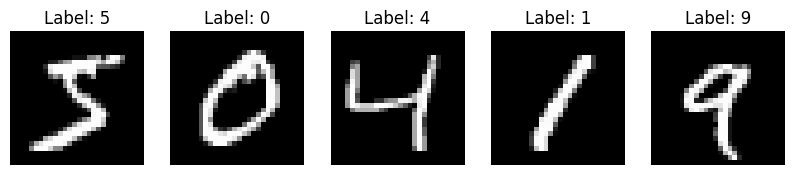

In [ ]:
# Mostrar 5 imágenes del dataset
#Visualización.
#Muestra al menos 5 imágenes con sus respectivas etiquetas para confirmar la
#correcta carga de datos.
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

In [ ]:
#Parte 2: Creación de la Arquitectura de la Red Neuronal
#I. Define una red neuronal convolucional utilizando Keras Sequential API.
# Crear el modelo
#Es un api para construir el modelo de manera ordenada y capa por capa
model = Sequential()

#II. La arquitectura debe incluir como mínimo:
#Dos capas convolucionales (Conv2D) usando funciones de activación ReLU.
#Capas de MaxPooling2D.
# Capas convolucionales:
# - Filtros: 64
# - Tamaño del kernel: 3x3
# - Función de activación: ReLU
# - Capa de MaxPooling: 2x2
model.add(Conv2D(64, (3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))  
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Capas densas
#Una capa de Flatten.
#Al menos una capa Dense con activación ReLU.
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

# Una capa de salida con 10 unidades y activación softmax (para las 10 clases de
#dígitos).
#10 una para cada digito del 0 al 9
# y se utiliza la activación "softmax" para generar probabilidades de pertenencia
# a cada clase.
model.add(Dense(10))
model.add(Activation("softmax"))

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Parte 3: Entrenamiento del Modelo
#I. Compila el modelo usando:
#Función de pérdida: sparse_categorical_crossentropy.
# Compilar el modelo
#Optimizador: adam.
#Métrica: accuracy.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

# II. Entrena el modelo con:
#Entrena el modelo con el número de épocas que mejor resultados genere (Es
#necesario concentrar un balance entre número de épocas usado y mejora en los
#resultados obtenidos).
##Valida con el conjunto de prueba.
history = model.fit(x_trainr, y_train, epochs=5, validation_split=0.3, verbose=1)


Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.8014 - loss: 0.5870 - val_accuracy: 0.9617 - val_loss: 0.1218
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.9701 - loss: 0.0959 - val_accuracy: 0.9738 - val_loss: 0.0822
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 48s 36ms/step - accuracy: 0.9803 - loss: 0.0662 - val_accuracy: 0.9776 - val_loss: 0.0748
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 62s 47ms/step - accuracy: 0.9830 - loss: 0.0499 - val_accuracy: 0.9779 - val_loss: 0.0791
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 61s 47ms/step - accuracy: 0.9882 - loss: 0.0393 - val_accuracy: 0.9842 - val_loss: 0.0537


In [ ]:
#Valida con el conjunto de prueba.
test_loss, test_accuracy = model.evaluate(x_testr, y_test, verbose=1)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9820 - loss: 0.0640
Precisión en el conjunto de prueba: 98.51%
Pérdida en el conjunto de prueba: 0.0518


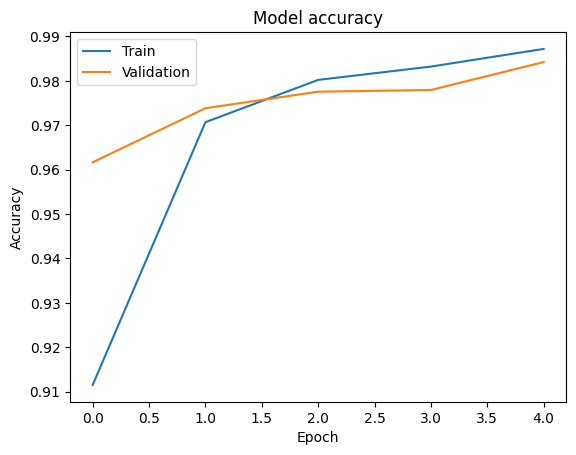

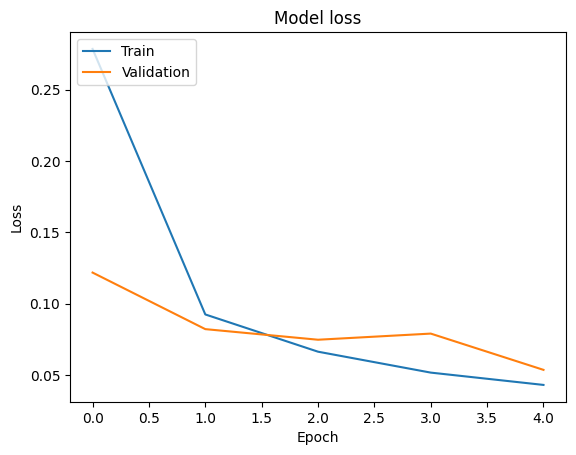

In [ ]:
# III. Grafica:
#La precisión (“Accuracy”) obtenida durante la etapa de entrenamiento y
#validación respectivamente.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# La pérdida durante la etapa de entrenamiento y validación respectivamente.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print("Métricas disponibles:", list(history.history.keys()))

Métricas disponibles: ['accuracy', 'loss', 'val_accuracy', 'val_loss']


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9820 - loss: 0.0640
Precisión (accuracy): 98.51%
Pérdida (loss): 0.0518
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.99      0.99     10000

F1-Score: 0.9850377229618685


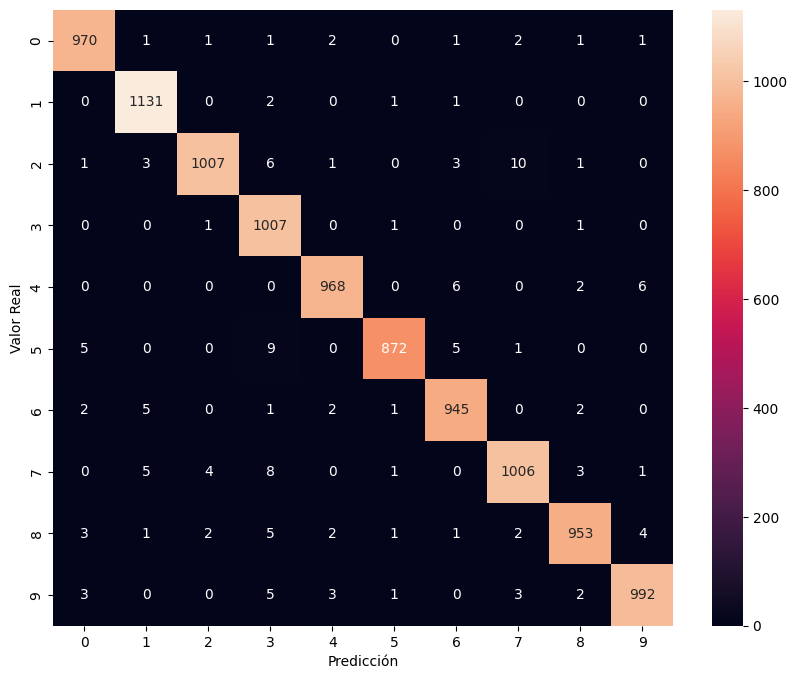

In [ ]:
#Parte 4: Evaluación del Modelo
#I. Evalúa el modelo con el conjunto de prueba (x_test, y_test).
test_loss, test_acc = model.evaluate(x_testr, y_test)
print(f"Precisión (accuracy): {test_acc * 100:.2f}%")
print(f"Pérdida (loss): {test_loss:.4f}")


#II. Muestra en pantalla:
#La precisión y el f1-score obtenido por el modelo durante la clasificación para
#los datos de prueba. El f1-score debe ser mayor a 0.9.
y_pred = model.predict(x_testr)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))
print(f'F1-Score: {f1_score(y_test, y_pred_classes, average="macro")}')

#III. Grafica:
#La matriz de confusión obtenida.

import seaborn as sns
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

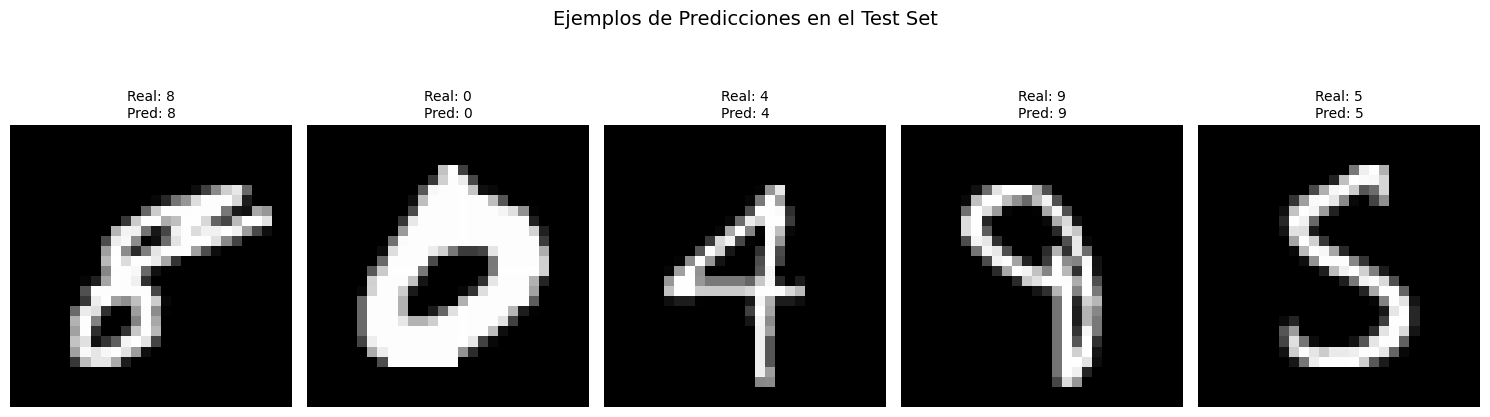

In [ ]:
#Gráfica de algunas predicciones (al menos 5), mostrando la imagen, etiqueta
#real y predicción.
import random
indices = random.sample(range(len(x_testr)), 5)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    # Obtener imagen y etiquetas
    img = x_testr[idx].reshape(28, 28)  # Redimensionar a 28x28
    true_label = y_test[idx]
    pred_label = y_pred_classes[idx]

    # Mostrar imagen
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Real: {true_label}\nPred: {pred_label}", fontsize=10)
    plt.axis("off")

plt.suptitle("Ejemplos de Predicciones en el Test Set", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Función para preprocesar imágenes de Paint
#II. Carga de la Imagen en Visual Studio Code.
##Coloca la imagen en el mismo directorio del script de Python.
def preprocess_paint_image(image_path):
    # Convertir a escala de grises.
    img = Image.open(image_path).convert('L')
    # Redimensionar a 28x28 píxeles.
    img = img.resize((28, 28))
    # Convertir a array numpy
    img_array = np.array(img)
    # Invertir colores si es necesario (MNIST es fondo negro y número blanco).
    if img_array[0, 0] > 128:  # Si el fondo es claro
        img_array = 255 - img_array
    # Normalizar valores entre 0 y 1.
    img_array = img_array / 255.0
    # Redimensionar a la forma esperada (1, 28, 28, 1).
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array

In [ ]:
#III. Predicción
# Función para predecir una imagen
def predict_digit(image_path):
    # Preprocesar la imagen
    processed_img = preprocess_paint_image(image_path)
    # Usa el modelo entrenado para predecir la clase del número dibujado.
    prediction = model.predict(processed_img)
    # Obtener el dígito con mayor probabilidad
    digit = np.argmax(prediction)
    # Muestra la imagen cargada junto con la predicción del modelo.
    img = Image.open(image_path)
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit}')
    plt.show()
    return digit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


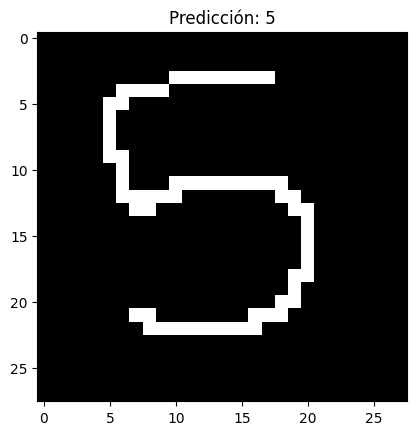

5

In [ ]:
#Parte 5: Clasificación de una Imagen Propia
predict_digit('7.png')